In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import preprocess

In [194]:
orig_df = pd.read_csv('./data/exhibition_behavior_preprocessed.csv', delimiter=',', index_col=False)
orig_df.head()

,uid,pid,date,filename,start,duration,A/C,behavior,code,M/F,appearance,time_ratio,code_score,engagement_score,norm_engagement_score,engagement_level
0,0,0,11월 19일,01_20221119085958_part2,56240,2720,Child,물리적거리,Approach,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.478873,3,3.521127,6.341146,mid
1,0,0,11월 19일,01_20221119085958_part2,59360,2960,Child,상호작용시도,None,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.521127,4,3.521127,6.341146,mid
2,0,1,11월 19일,01_20221119085958_part2,71420,5520,Child,물리적거리,Approach,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.466216,3,3.533784,6.372981,mid
3,0,1,11월 19일,01_20221119085958_part2,77400,6320,Child,상호작용시도,None,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.533784,4,3.533784,6.372981,mid
4,1,2,11월 19일,01_20221119085958_part2,48240,9240,Child,물리적거리,Approach,Male,"검정색 점퍼, 청바지, 검정/흰색 운동화",0.371981,3,3.628019,6.610002,mid


In [195]:
orig_df = orig_df.drop(['pid', 'time_ratio', 'engagement_score', 'norm_engagement_score', 'engagement_level'], axis=1)

In [196]:
orig_df = preprocess.indexing(orig_df)

    uid     date                 filename   start  duration    A/C behavior  \
0     0  11월 19일  01_20221119085958_part2   56240      2720  Child    물리적거리   
1     0  11월 19일  01_20221119085958_part2   59360      2960  Child   상호작용시도   
2     0  11월 19일  01_20221119085958_part2   71420      5520  Child    물리적거리   
3     0  11월 19일  01_20221119085958_part2   77400      6320  Child   상호작용시도   
4     1  11월 19일  01_20221119085958_part2   48240      9240  Child    물리적거리   
5     1  11월 19일  01_20221119085958_part2   56640     15600  Child   상호작용시도   
6     1  11월 19일  01_20221119085958_part2   71200      5920  Child    물리적거리   
7     1  11월 19일  01_20221119085958_part2   77400      6360  Child   상호작용시도   
8     2  11월 19일  01_20221119085958_part2    3000     21040  Child    물리적거리   
9     2  11월 19일  01_20221119085958_part2  238160      4160  Child    물리적거리   
10    2  11월 19일  01_20221119085958_part2  242320      7760  Child   상호작용시도   
11    3  11월 19일  01_20221119085958_part2  233440   

In [197]:
orig_df = preprocess.reindex(orig_df)

In [198]:
orig_df = preprocess.cal_time_ratio(orig_df)

In [199]:
scores = {'Pass': 1, 'Follow': 2, 'Avoid': 2, 'Approach': 3, 
          'None': 4, 'Touch': 5, 'Gesture': 5}
orig_df = preprocess.map_code_score(orig_df, scores)

In [200]:
orig_df

,uid,pid,date,filename,start,duration,A/C,behavior,code,M/F,appearance,time_ratio,code_score
0,0,0,11월 19일,01_20221119085958_part2,56240,2720,Child,물리적거리,Approach,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.478873,3
1,0,0,11월 19일,01_20221119085958_part2,59360,2960,Child,상호작용시도,None,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.521127,4
2,0,1,11월 19일,01_20221119085958_part2,71420,5520,Child,물리적거리,Approach,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.466216,3
3,0,1,11월 19일,01_20221119085958_part2,77400,6320,Child,상호작용시도,None,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",0.533784,4
4,1,2,11월 19일,01_20221119085958_part2,48240,9240,Child,물리적거리,Approach,Male,"검정색 점퍼, 청바지, 검정/흰색 운동화",0.371981,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,371,1116,12월 4일,01_20221204165959_part1,2567280,17280,Child,물리적거리,Pass,Female,"하늘색 롱패딩, 흰색 바지",1.000000,1
2683,371,1117,12월 4일,01_20221204165959_part1,2893760,14160,Child,물리적거리,Pass,Female,"하늘색 롱패딩, 흰색 바지",1.000000,1
2684,372,1118,12월 4일,01_20221204165959_part1,2567280,18080,Adult,물리적거리,Pass,Male,"검은색 롱패딩, 검은색 바지",1.000000,1
2685,373,1119,12월 4일,01_20221204165959_part2,15760,13840,Child,물리적거리,Pass,Female,"하늘색 롱패딩, 흰색 바지",1.000000,1


In [207]:
def make_data(df):
    df = df.groupby('pid').agg({'code': list, 'duration': list, 'time_ratio': list, 'code_score': list, 'A/C': 'first', 'M/F': 'first', 'appearance': 'first'})
    df = df.drop(df[df['code'].apply(lambda x: len(x) <= 1)].index)
    
    return df

In [208]:
df = make_data(orig_df)

In [209]:
df['code_count'] = [len(x) for x in df['code']]

In [210]:
df

,code,duration,time_ratio,code_score,A/C,M/F,appearance,code_count
pid,,,,,,,,
0,"[Approach, None]","[2720, 2960]","[0.4788732394366197, 0.5211267605633803]","[3, 4]",Child,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",2
1,"[Approach, None]","[5520, 6320]","[0.46621621621621623, 0.5337837837837838]","[3, 4]",Child,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",2
2,"[Approach, None]","[9240, 15600]","[0.3719806763285024, 0.6280193236714976]","[3, 4]",Child,Male,"검정색 점퍼, 청바지, 검정/흰색 운동화",2
3,"[Approach, None]","[5920, 6360]","[0.4820846905537459, 0.5179153094462541]","[3, 4]",Child,Male,"검정색 점퍼, 청바지, 검정/흰색 운동화",2
5,"[Approach, None]","[4160, 7760]","[0.348993288590604, 0.6510067114093959]","[3, 4]",Child,Male,"검정 마스크, 흰색 후리스, 회색 트레이닝 바지",2
...,...,...,...,...,...,...,...,...
1108,"[Approach, None, Gesture, None]","[7680, 5200, 2800, 2400]","[0.4247787610619469, 0.28761061946902655, 0.15...","[3, 4, 5, 4]",Child,Male,"검은색 롱패딩, 검은색 바지",4
1109,"[Approach, None, Gesture, None, Gesture, None]","[5360, 45360, 1840, 36400, 6320, 62800]","[0.03390688259109312, 0.28694331983805665, 0.0...","[3, 4, 5, 4, 5, 4]",Child,Male,"검은색 롱패딩, 검은색 바지",6
1110,"[Approach, None]","[3840, 11680]","[0.24742268041237114, 0.7525773195876289]","[3, 4]",Child,Male,"검은색 롱패딩, 검은색 바지",2


In [211]:
def cal_engagement_score(df):
    engagement_scores = []
    for i in df.index:
        engagement_score = []
        for code_score, time_ratio in zip(df['code_score'][i], df['time_ratio'][i]):
            engagement_score.append(code_score * time_ratio)
        engagement_scores.append(sum(engagement_score))

    df['engagement_score'] = engagement_scores
    return df

In [212]:
df = cal_engagement_score(df)

In [213]:
def normalize(df, col_name, scale=100):
    min_score = df[col_name].min()
    max_score = df[col_name].max()
    df['norm_engagement_score'] = (df[col_name] - min_score) / (max_score - min_score) * scale
    
    return df

In [214]:
df = normalize(df, 'engagement_score')

In [215]:
df

,code,duration,time_ratio,code_score,A/C,M/F,appearance,code_count,engagement_score,norm_engagement_score
pid,,,,,,,,,,
0,"[Approach, None]","[2720, 2960]","[0.4788732394366197, 0.5211267605633803]","[3, 4]",Child,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",2,3.521127,56.240644
1,"[Approach, None]","[5520, 6320]","[0.46621621621621623, 0.5337837837837838]","[3, 4]",Child,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",2,3.533784,56.621386
2,"[Approach, None]","[9240, 15600]","[0.3719806763285024, 0.6280193236714976]","[3, 4]",Child,Male,"검정색 점퍼, 청바지, 검정/흰색 운동화",2,3.628019,59.456128
3,"[Approach, None]","[5920, 6360]","[0.4820846905537459, 0.5179153094462541]","[3, 4]",Child,Male,"검정색 점퍼, 청바지, 검정/흰색 운동화",2,3.517915,56.144039
5,"[Approach, None]","[4160, 7760]","[0.348993288590604, 0.6510067114093959]","[3, 4]",Child,Male,"검정 마스크, 흰색 후리스, 회색 트레이닝 바지",2,3.651007,60.147622
...,...,...,...,...,...,...,...,...,...,...
1108,"[Approach, None, Gesture, None]","[7680, 5200, 2800, 2400]","[0.4247787610619469, 0.28761061946902655, 0.15...","[3, 4, 5, 4]",Child,Male,"검은색 롱패딩, 검은색 바지",4,3.730088,62.526518
1109,"[Approach, None, Gesture, None, Gesture, None]","[5360, 45360, 1840, 36400, 6320, 62800]","[0.03390688259109312, 0.28694331983805665, 0.0...","[3, 4, 5, 4, 5, 4]",Child,Male,"검은색 롱패딩, 검은색 바지",6,4.017713,71.178669
1110,"[Approach, None]","[3840, 11680]","[0.24742268041237114, 0.7525773195876289]","[3, 4]",Child,Male,"검은색 롱패딩, 검은색 바지",2,3.752577,63.203014


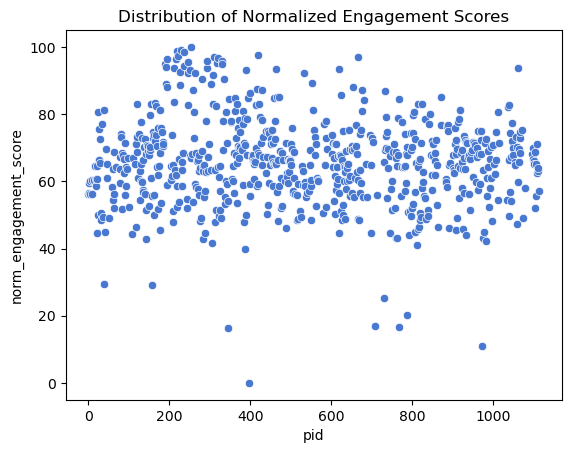

In [216]:
# scatter plot 그리기
sns.scatterplot(x='pid', y='norm_engagement_score', data=df)
plt.title('Distribution of Normalized Engagement Scores')
plt.show()

In [217]:
def classify_level(df, threshold=50):
    engagement_levels = []
    for i in df.index:
        if df['norm_engagement_score'][i] > threshold:
            engagement_levels.append('high')
        else:
            engagement_levels.append('low')
            
    df['engagement_level'] = engagement_levels
    
    return df

In [218]:
df_50 = classify_level(df)

In [219]:
df_50

,code,duration,time_ratio,code_score,A/C,M/F,appearance,code_count,engagement_score,norm_engagement_score,engagement_level
pid,,,,,,,,,,,
0,"[Approach, None]","[2720, 2960]","[0.4788732394366197, 0.5211267605633803]","[3, 4]",Child,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",2,3.521127,56.240644,high
1,"[Approach, None]","[5520, 6320]","[0.46621621621621623, 0.5337837837837838]","[3, 4]",Child,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",2,3.533784,56.621386,high
2,"[Approach, None]","[9240, 15600]","[0.3719806763285024, 0.6280193236714976]","[3, 4]",Child,Male,"검정색 점퍼, 청바지, 검정/흰색 운동화",2,3.628019,59.456128,high
3,"[Approach, None]","[5920, 6360]","[0.4820846905537459, 0.5179153094462541]","[3, 4]",Child,Male,"검정색 점퍼, 청바지, 검정/흰색 운동화",2,3.517915,56.144039,high
5,"[Approach, None]","[4160, 7760]","[0.348993288590604, 0.6510067114093959]","[3, 4]",Child,Male,"검정 마스크, 흰색 후리스, 회색 트레이닝 바지",2,3.651007,60.147622,high
...,...,...,...,...,...,...,...,...,...,...,...
1108,"[Approach, None, Gesture, None]","[7680, 5200, 2800, 2400]","[0.4247787610619469, 0.28761061946902655, 0.15...","[3, 4, 5, 4]",Child,Male,"검은색 롱패딩, 검은색 바지",4,3.730088,62.526518,high
1109,"[Approach, None, Gesture, None, Gesture, None]","[5360, 45360, 1840, 36400, 6320, 62800]","[0.03390688259109312, 0.28694331983805665, 0.0...","[3, 4, 5, 4, 5, 4]",Child,Male,"검은색 롱패딩, 검은색 바지",6,4.017713,71.178669,high
1110,"[Approach, None]","[3840, 11680]","[0.24742268041237114, 0.7525773195876289]","[3, 4]",Child,Male,"검은색 롱패딩, 검은색 바지",2,3.752577,63.203014,high


In [220]:
df_50['engagement_level'].value_counts()

high    619
low      70
Name: engagement_level, dtype: int64

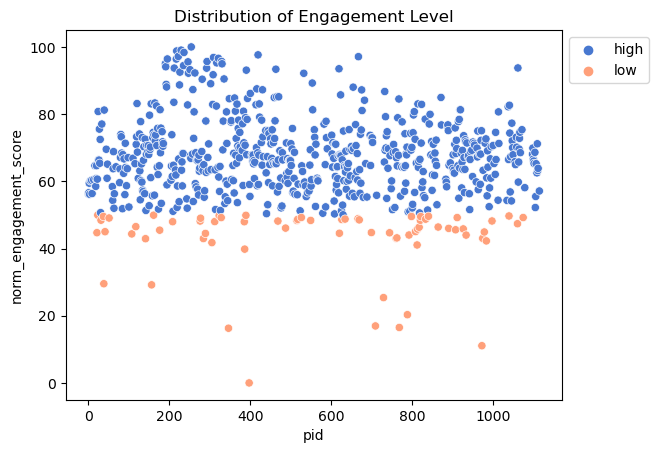

In [221]:
palette = {"high": "#4878d0", "low": "#ffa07a"}
sns.scatterplot(x='pid', y='norm_engagement_score', hue='engagement_level', palette=palette, data=df_50)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Distribution of Engagement Level")
plt.show()

In [222]:
df_70 = classify_level(df, threshold=70)
df_70['engagement_level'].value_counts()

low     465
high    224
Name: engagement_level, dtype: int64

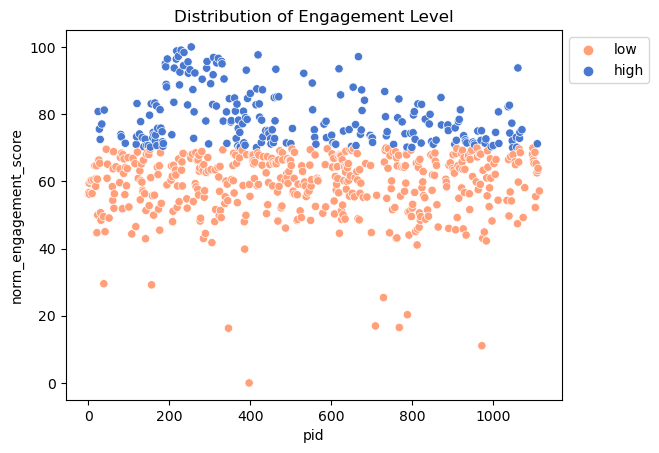

In [223]:
palette = {"high": "#4878d0", "low": "#ffa07a"}
sns.scatterplot(x='pid', y='norm_engagement_score', hue='engagement_level', palette=palette, data=df_50)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Distribution of Engagement Level")
plt.show()

In [224]:
df_70

,code,duration,time_ratio,code_score,A/C,M/F,appearance,code_count,engagement_score,norm_engagement_score,engagement_level
pid,,,,,,,,,,,
0,"[Approach, None]","[2720, 2960]","[0.4788732394366197, 0.5211267605633803]","[3, 4]",Child,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",2,3.521127,56.240644,low
1,"[Approach, None]","[5520, 6320]","[0.46621621621621623, 0.5337837837837838]","[3, 4]",Child,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",2,3.533784,56.621386,low
2,"[Approach, None]","[9240, 15600]","[0.3719806763285024, 0.6280193236714976]","[3, 4]",Child,Male,"검정색 점퍼, 청바지, 검정/흰색 운동화",2,3.628019,59.456128,low
3,"[Approach, None]","[5920, 6360]","[0.4820846905537459, 0.5179153094462541]","[3, 4]",Child,Male,"검정색 점퍼, 청바지, 검정/흰색 운동화",2,3.517915,56.144039,low
5,"[Approach, None]","[4160, 7760]","[0.348993288590604, 0.6510067114093959]","[3, 4]",Child,Male,"검정 마스크, 흰색 후리스, 회색 트레이닝 바지",2,3.651007,60.147622,low
...,...,...,...,...,...,...,...,...,...,...,...
1108,"[Approach, None, Gesture, None]","[7680, 5200, 2800, 2400]","[0.4247787610619469, 0.28761061946902655, 0.15...","[3, 4, 5, 4]",Child,Male,"검은색 롱패딩, 검은색 바지",4,3.730088,62.526518,low
1109,"[Approach, None, Gesture, None, Gesture, None]","[5360, 45360, 1840, 36400, 6320, 62800]","[0.03390688259109312, 0.28694331983805665, 0.0...","[3, 4, 5, 4, 5, 4]",Child,Male,"검은색 롱패딩, 검은색 바지",6,4.017713,71.178669,high
1110,"[Approach, None]","[3840, 11680]","[0.24742268041237114, 0.7525773195876289]","[3, 4]",Child,Male,"검은색 롱패딩, 검은색 바지",2,3.752577,63.203014,low


In [225]:
df_70 = df_70.reindex(columns=['code', 'code_count', 'code_score', 'duration', 'time_ratio', 'A/C', 'M/F', 'appearance', 'engagement_score', 'norm_engagement_score', 'engagement_level'])

In [226]:
df_70

,code,code_count,code_score,duration,time_ratio,A/C,M/F,appearance,engagement_score,norm_engagement_score,engagement_level
pid,,,,,,,,,,,
0,"[Approach, None]",2,"[3, 4]","[2720, 2960]","[0.4788732394366197, 0.5211267605633803]",Child,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",3.521127,56.240644,low
1,"[Approach, None]",2,"[3, 4]","[5520, 6320]","[0.46621621621621623, 0.5337837837837838]",Child,Female,"포니테일, 아이보리색 점퍼, 검정색 바지",3.533784,56.621386,low
2,"[Approach, None]",2,"[3, 4]","[9240, 15600]","[0.3719806763285024, 0.6280193236714976]",Child,Male,"검정색 점퍼, 청바지, 검정/흰색 운동화",3.628019,59.456128,low
3,"[Approach, None]",2,"[3, 4]","[5920, 6360]","[0.4820846905537459, 0.5179153094462541]",Child,Male,"검정색 점퍼, 청바지, 검정/흰색 운동화",3.517915,56.144039,low
5,"[Approach, None]",2,"[3, 4]","[4160, 7760]","[0.348993288590604, 0.6510067114093959]",Child,Male,"검정 마스크, 흰색 후리스, 회색 트레이닝 바지",3.651007,60.147622,low
...,...,...,...,...,...,...,...,...,...,...,...
1108,"[Approach, None, Gesture, None]",4,"[3, 4, 5, 4]","[7680, 5200, 2800, 2400]","[0.4247787610619469, 0.28761061946902655, 0.15...",Child,Male,"검은색 롱패딩, 검은색 바지",3.730088,62.526518,low
1109,"[Approach, None, Gesture, None, Gesture, None]",6,"[3, 4, 5, 4, 5, 4]","[5360, 45360, 1840, 36400, 6320, 62800]","[0.03390688259109312, 0.28694331983805665, 0.0...",Child,Male,"검은색 롱패딩, 검은색 바지",4.017713,71.178669,high
1110,"[Approach, None]",2,"[3, 4]","[3840, 11680]","[0.24742268041237114, 0.7525773195876289]",Child,Male,"검은색 롱패딩, 검은색 바지",3.752577,63.203014,low


In [227]:
df_70.to_csv('./data/behavior_reduced.csv')